In [9]:
# ============================================
# 📘 ANALISIS TINGKAT PENGANGGURAN TERBUKA 2018–2024
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# ============================================
# 1️⃣ Baca Dataset
# ============================================
df = pd.read_csv("tpt_bps_2018_2024.csv")

# Tampilkan 5 baris awal
df.head()


,id,kode_provinsi,nama_provinsi,indeks_tpt,satuan,tahun
0,1,11,ACEH,6.34,PERSEN,2018
1,2,12,SUMATERA UTARA,5.55,PERSEN,2018
2,3,13,SUMATERA BARAT,5.66,PERSEN,2018
3,4,14,RIAU,5.98,PERSEN,2018
4,5,15,JAMBI,3.73,PERSEN,2018


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             242 non-null    int64  
 1   kode_provinsi  242 non-null    int64  
 2   nama_provinsi  242 non-null    object 
 3   indeks_tpt     242 non-null    float64
 4   satuan         242 non-null    object 
 5   tahun          242 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 11.5+ KB


,id,kode_provinsi,indeks_tpt,tahun
count,242.000000,242.000000,242.000000,242.000000
mean,121.500000,48.342975,4.989876,2021.049587
std,70.003571,26.645244,1.719940,2.024133
min,1.000000,11.000000,1.320000,2018.000000
25%,61.250000,19.000000,3.770000,2019.000000
50%,121.500000,52.000000,4.625000,2021.000000
75%,181.750000,72.000000,6.107500,2023.000000
max,242.000000,97.000000,10.950000,2024.000000


In [12]:
# Pastikan kolom angka jadi tipe numerik
df["indeks_tpt"] = pd.to_numeric(df["indeks_tpt"], errors="coerce")
df["tahun"] = pd.to_numeric(df["tahun"], errors="coerce")

# Cek missing values
df.isnull().sum()


id               0
kode_provinsi    0
nama_provinsi    0
indeks_tpt       0
satuan           0
tahun            0
dtype: int64

c:\Users\userl\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


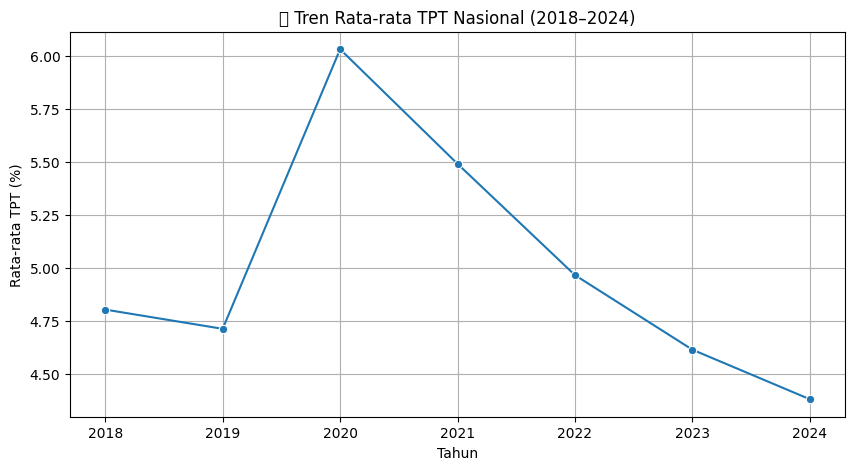

In [13]:
# Hitung rata-rata nasional per tahun
rata_tpt = df.groupby("tahun")["indeks_tpt"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=rata_tpt, x="tahun", y="indeks_tpt", marker="o")
plt.title("📉 Tren Rata-rata TPT Nasional (2018–2024)")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata TPT (%)")
plt.grid(True)
plt.show()


C:\Users\userl\AppData\Local\Temp\ipykernel_11076\475186870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2024, y="nama_provinsi", x="indeks_tpt", palette="viridis")
C:\Users\userl\AppData\Local\Temp\ipykernel_11076\475186870.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\userl\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


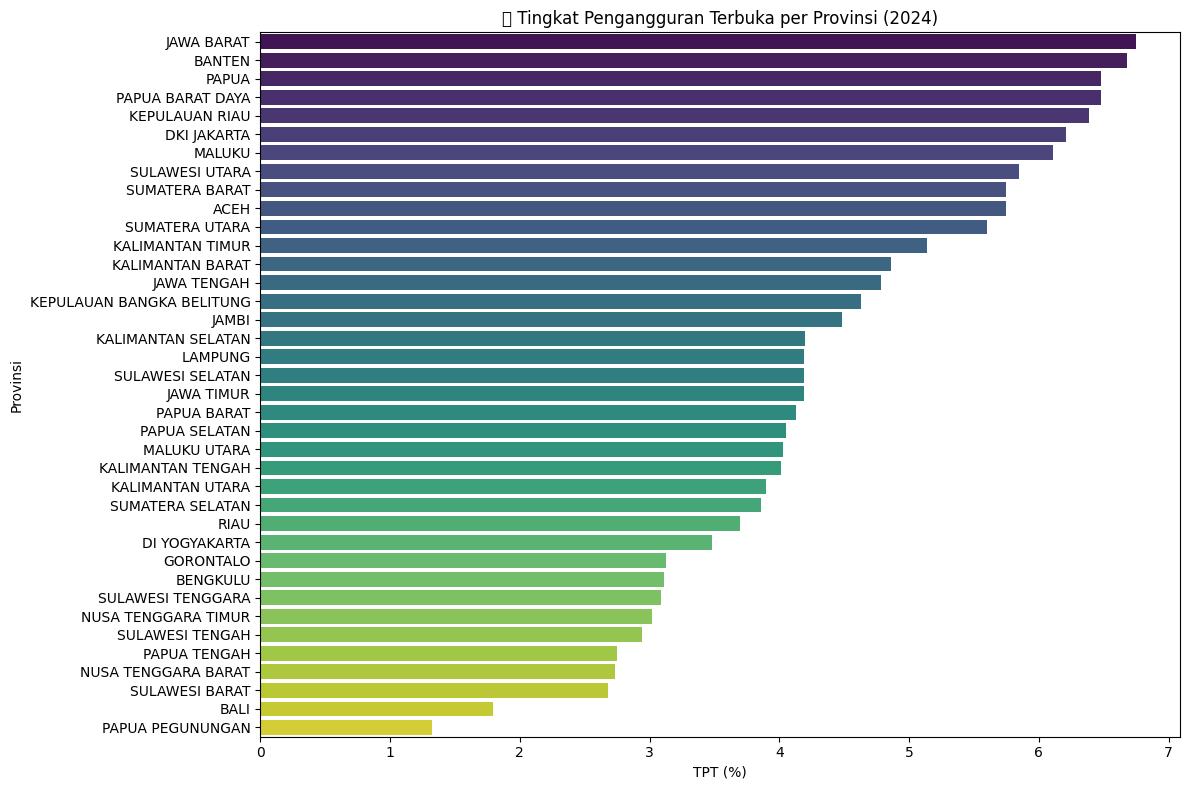

In [14]:
# Filter tahun terakhir (2024)
df_2024 = df[df["tahun"] == 2024].sort_values("indeks_tpt", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=df_2024, y="nama_provinsi", x="indeks_tpt", palette="viridis")
plt.title("📊 Tingkat Pengangguran Terbuka per Provinsi (2024)")
plt.xlabel("TPT (%)")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.show()


c:\Users\userl\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


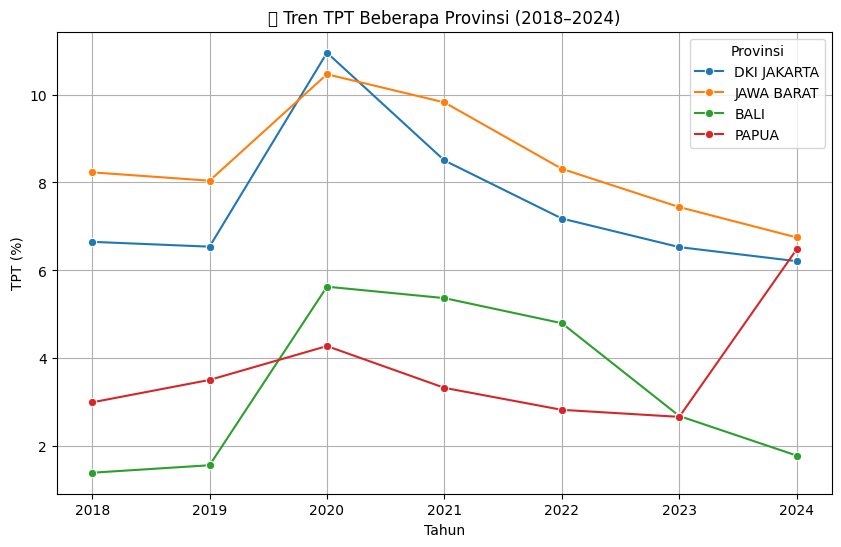

In [15]:
# Pilih beberapa provinsi untuk dibandingkan
provinsi_pilihan = ["DKI JAKARTA", "JAWA BARAT", "BALI", "PAPUA"]

plt.figure(figsize=(10,6))
sns.lineplot(data=df[df["nama_provinsi"].isin(provinsi_pilihan)],
             x="tahun", y="indeks_tpt", hue="nama_provinsi", marker="o")
plt.title("📈 Tren TPT Beberapa Provinsi (2018–2024)")
plt.xlabel("Tahun")
plt.ylabel("TPT (%)")
plt.legend(title="Provinsi")
plt.grid(True)
plt.show()
